In [1]:
!pip install -q wandb

If running this notebook in Colab, please ensure that your Hugging Face `HF_TOKEN` and your Weights & Biases `WANDB_API_KEY` are added to your Colab secrets.

In [2]:
import wandb
from google.colab import userdata

wandb.login(key=userdata.get('WANDB_API_KEY'))

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

Alternatively, please login to Hugging Face and Weights & Biases by running the following two cells.

In [3]:
# !huggingface-cli login

In [4]:
# !wandb login

In [5]:
import os
import random
import numpy as np
import torch

def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [6]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
type(housing)

sklearn.utils._bunch.Bunch

In [7]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
housing['data']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
housing['data'].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [10]:
housing['target']

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [11]:
type(housing['target'])

pandas.core.series.Series

In [12]:
housing['target'].describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


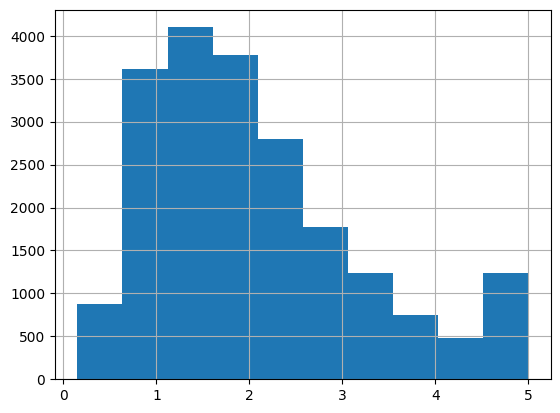

In [13]:
housing['target'].hist();

The distribution is slightly skewed to the right.

In [14]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(housing['data'], housing['target'], test_size=0.25, random_state=42)
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((11610, 8), (3870, 8), (11610,), (3870,))

In [16]:
X_means, X_stds = X_train.mean(axis=0), X_train.std(axis=0)
X_means.shape, X_stds.shape

((8,), (8,))

In [17]:
X_means

,0
MedInc,3.891759
HouseAge,28.624548
AveRooms,5.455937
AveBedrms,1.099635
Population,1424.281223
AveOccup,2.958867
Latitude,35.646432
Longitude,-119.584363


In [18]:
X_stds

,0
MedInc,1.909356
HouseAge,12.641462
AveRooms,2.550491
AveBedrms,0.465480
Population,1095.807192
AveOccup,2.361482
Latitude,2.134659
Longitude,2.001019


In [19]:
X_train = (X_train - X_means) / X_stds
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.161000e+04,1.161000e+04,1.161000e+04,1.161000e+04,1.161000e+04,1.161000e+04,1.161000e+04,1.161000e+04
mean,2.937644e-17,4.651270e-17,3.488453e-17,-8.047922e-17,1.836028e-17,4.406467e-17,-1.878868e-15,-3.159192e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.776442e+00,-2.185234e+00,-1.790655e+00,-1.646260e+00,-1.297018e+00,-9.598035e-01,-1.450551e+00,-2.381605e+00
25%,-6.896351e-01,-8.404525e-01,-3.886801e-01,-1.992465e-01,-5.815633e-01,-2.250478e-01,-7.993932e-01,-1.112252e+00
50%,-1.745922e-01,2.970006e-02,-8.272357e-02,-1.074281e-01,-2.347869e-01,-6.004621e-02,-6.494863e-01,5.419052e-01
75%,4.615387e-01,6.625383e-01,2.415810e-01,1.333583e-03,2.753393e-01,1.369403e-01,9.713818e-01,7.867804e-01
max,5.817849e+00,1.849110e+00,5.350075e+01,5.271273e+01,1.357969e+01,9.621650e+01,2.952963e+00,2.635838e+00


In [20]:
X_valid = (X_valid - X_means) / X_stds
X_valid.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,-0.028165,-0.009035,-0.031897,-0.023662,0.011740,0.250340,0.000540,0.001253
std,0.988112,0.990529,0.778139,0.744590,1.162605,9.975080,0.998800,1.002969
min,-1.757535,-2.106129,-1.585831,-1.556747,-1.286067,-0.757803,-1.445867,-2.341625
25%,-0.706067,-0.840452,-0.402966,-0.201637,-0.572894,-0.216960,-0.804078,-1.106005
50%,-0.208033,0.029700,-0.100531,-0.108805,-0.232049,-0.058949,-0.640117,0.521915
75%,0.442147,0.662538,0.223178,0.000785,0.278077,0.133395,0.971382,0.786780
max,5.817849,1.849110,18.581632,22.151490,31.262542,525.252521,2.887379,2.555879


In [21]:
X_test = (X_test - X_means) / X_stds
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,-0.023053,0.011503,-0.018323,-0.007686,-0.004441,0.001599,-0.027707,0.028362
std,0.988748,0.989461,1.029445,1.216744,1.004324,0.688820,1.003223,1.002691
min,-1.776442,-2.185234,-1.807410,-1.288207,-1.292455,-0.717897,-1.455236,-2.331630
25%,-0.701943,-0.840452,-0.410190,-0.204446,-0.586126,-0.224560,-0.808762,-1.087265
50%,-0.199339,0.029700,-0.092927,-0.112967,-0.240262,-0.058149,-0.668225,0.556898
75%,0.427653,0.662538,0.227899,-0.004724,0.265301,0.139083,0.962013,0.796775
max,5.817849,1.849110,49.824688,70.823708,13.412687,33.967041,2.910802,2.500907


In [22]:
from torch.utils.data import Dataset, DataLoader

class CaliforniaHousingDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return {'input_wide': self.X[idx, :5], 'input_deep': self.X[idx, 2:], 'label': self.y[idx]}

**Note:** As per Chapter 10 in Aurelien Geron's book, features `0` to `4` comprise `input_wide`, whereas features `2` to `7` comprise `input_deep`.

In [23]:
train_set = CaliforniaHousingDataset(X_train, y_train)
len(train_set)

11610

In [24]:
# Sanity check:
example = train_set[0]
example

{'input_wide': tensor([-0.1940, -1.0778, -0.9433,  0.0149,  0.0207]),
 'input_deep': tensor([-0.9433,  0.0149,  0.0207, -0.5729,  0.9292, -1.4221]),
 'label': tensor(1.4420)}

In [25]:
example['input_wide'].shape, example['input_deep'].shape, example['label'].shape

(torch.Size([5]), torch.Size([6]), torch.Size([]))

In [26]:
valid_set = CaliforniaHousingDataset(X_valid, y_valid)
test_set = CaliforniaHousingDataset(X_test, y_test)
len(valid_set), len(test_set)

(3870, 5160)

In [27]:
batch_size = 128
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
len(train_loader)

91

In [28]:
# Sanity check:
batch = next(iter(train_loader))
batch['input_wide'].shape, batch['input_deep'].shape, batch['label'].shape

(torch.Size([128, 5]), torch.Size([128, 6]), torch.Size([128]))

In [29]:
batch['input_wide'].dtype, batch['input_deep'].dtype, batch['label'].dtype

(torch.float32, torch.float32, torch.float32)

In [30]:
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)
len(valid_loader), len(test_loader)

(31, 41)

In [31]:
device = torch.device("cpu")
device

device(type='cpu')

![](https://raw.githubusercontent.com/sambitmukherjee/handson-ml3-pytorch/main/chapter10/Figure_10-15.png)

In [32]:
from dataclasses import dataclass
from typing import Optional

@dataclass
class WideAndDeepNetOutput:
    main_output: torch.Tensor
    aux_output: torch.Tensor
    main_loss: Optional[torch.Tensor] = None
    aux_loss: Optional[torch.Tensor] = None
    loss: Optional[torch.Tensor] = None

In [33]:
# Test:
output = WideAndDeepNetOutput(
    main_output=torch.tensor([[1.], [2.]]),
    aux_output=torch.tensor([[3.], [4.]])
)
output

WideAndDeepNetOutput(main_output=tensor([[1.],
        [2.]]), aux_output=tensor([[3.],
        [4.]]), main_loss=None, aux_loss=None, loss=None)

In [34]:
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin

class WideAndDeepNet(nn.Module, PyTorchModelHubMixin):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(6, 30)
        self.hidden2 = nn.Linear(30, 30)
        self.main_head = nn.Linear(35, 1)
        self.aux_head = nn.Linear(30, 1)
        self.main_loss_fn = nn.MSELoss(reduction='sum')
        self.aux_loss_fn = nn.MSELoss(reduction='sum')

    def forward(self, input_wide, input_deep, label=None):
        act = torch.relu(self.hidden1(input_deep))
        act = torch.relu(self.hidden2(act))
        concat = torch.cat([input_wide, act], dim=1)
        main_output = self.main_head(concat)
        aux_output = self.aux_head(act)
        if label is not None:
            main_loss = self.main_loss_fn(main_output.squeeze(), label)
            aux_loss = self.aux_loss_fn(aux_output.squeeze(), label)
            loss = 0.9 * main_loss + 0.1 * aux_loss
            return WideAndDeepNetOutput(main_output, aux_output, main_loss, aux_loss, loss)
        else:
            return WideAndDeepNetOutput(main_output, aux_output)

In [35]:
model = WideAndDeepNet()
model.to(device)

WideAndDeepNet(
  (hidden1): Linear(in_features=6, out_features=30, bias=True)
  (hidden2): Linear(in_features=30, out_features=30, bias=True)
  (main_head): Linear(in_features=35, out_features=1, bias=True)
  (aux_head): Linear(in_features=30, out_features=1, bias=True)
  (main_loss_fn): MSELoss()
  (aux_loss_fn): MSELoss()
)

In [36]:
# Sanity check:
with torch.no_grad():
    output = model(**batch)
output

WideAndDeepNetOutput(main_output=tensor([[ 0.1852],
        [ 0.1022],
        [-0.2765],
        [ 0.1174],
        [-0.0673],
        [ 0.0294],
        [-0.0721],
        [ 0.3031],
        [ 0.0191],
        [-0.0305],
        [ 0.2713],
        [-0.0918],
        [ 0.5857],
        [-0.0025],
        [ 0.0851],
        [ 0.0882],
        [ 0.2225],
        [ 0.0614],
        [ 0.3941],
        [ 0.0227],
        [ 0.1273],
        [ 0.0041],
        [-0.0945],
        [ 0.1194],
        [ 0.0618],
        [ 0.0449],
        [ 0.0622],
        [ 0.1373],
        [ 0.0082],
        [-0.0024],
        [ 0.0073],
        [-0.0243],
        [ 0.0516],
        [ 0.2846],
        [ 0.0186],
        [ 0.1714],
        [ 0.0513],
        [ 0.3184],
        [-0.0849],
        [-0.0179],
        [-0.1918],
        [ 0.0557],
        [ 0.0945],
        [-0.0345],
        [ 0.1968],
        [ 0.0658],
        [-0.0112],
        [ 0.0522],
        [ 0.0117],
        [ 0.0494],
        [ 0.0096]

In [37]:
output.main_output.shape, output.aux_output.shape

(torch.Size([128, 1]), torch.Size([128, 1]))

In [38]:
from torch.optim import Adam

learning_rate = 1e-3
optimizer = Adam(model.parameters(), lr=learning_rate)
n_epochs = 100
patience = 10

In [39]:
def train_epoch():
    model.train()
    train_main_loss = 0
    train_aux_loss = 0
    train_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        output = model(**batch)
        loss = output.loss
        train_main_loss += output.main_loss.item()
        train_aux_loss += output.aux_loss.item()
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_main_loss = round(train_main_loss / len(train_set), 4)
    train_aux_loss = round(train_aux_loss / len(train_set), 4)
    train_loss = round(train_loss / len(train_set), 4)
    return train_main_loss, train_aux_loss, train_loss

In [40]:
def validate_epoch():
    model.eval()
    valid_main_loss = 0
    valid_aux_loss = 0
    valid_loss = 0
    for batch in valid_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            output = model(**batch)
        valid_main_loss += output.main_loss.item()
        valid_aux_loss += output.aux_loss.item()
        valid_loss += output.loss.item()
    valid_main_loss /= len(valid_set)
    rmse = round(valid_main_loss**0.5, 4)
    valid_main_loss = round(valid_main_loss, 4)
    valid_aux_loss = round(valid_aux_loss / len(valid_set), 4)
    valid_loss = round(valid_loss / len(valid_set), 4)
    return valid_main_loss, valid_aux_loss, valid_loss, rmse

In [41]:
wandb_config = {
    'architecture': "WideAndDeepNet with Auxiliary Output",
    'dataset': "California Housing",
    'batch_size': batch_size,
    'learning_rate': learning_rate,
    'n_epochs': n_epochs,
    'patience': patience
}
wandb.init(
    project="wide-and-deep-net-california-housing",
    config=wandb_config,
    notes="Summary metrics: min of train_loss, valid_loss & rmse."
)
wandb.define_metric("train_loss", summary="min")
wandb.define_metric("valid_loss", summary="min")
wandb.define_metric("rmse", summary="min")

wandb: Currently logged in as: sadhaklal. Use `wandb login --relogin` to force relogin


In [42]:
no_progress_counter = 0
best_epoch = 0
best_rmse = float('inf')
for epoch in range(n_epochs):
    train_main_loss, train_aux_loss, train_loss = train_epoch()

    valid_main_loss, valid_aux_loss, valid_loss, rmse = validate_epoch()

    print(f"Epoch: {epoch}, Train Main Loss: {train_main_loss}, Train Aux Loss: {train_aux_loss}, Train Loss: {train_loss}")
    print(f"Valid Main Loss: {valid_main_loss}, Valid Aux Loss: {valid_aux_loss}, Valid Loss: {valid_loss}, RMSE: {rmse}")
    wandb.log({'train_loss': train_loss, 'valid_loss': valid_loss, 'rmse': rmse})

    if rmse < best_rmse:
        no_progress_counter = 0 # Reset.
        best_epoch = epoch
        best_rmse = rmse
        model.push_to_hub("wide-and-deep-net-california-housing-v3", commit_message=f"epoch: {epoch}, rmse: {rmse}")
    else:
        no_progress_counter += 1
    print("---")

    if no_progress_counter >= patience:
        print(f"No progress achieved for {no_progress_counter} epochs. Stopping early!")
        break
wandb.finish()
print("---")
print("Done!")
print(f"Best Epoch: {best_epoch}, Best RMSE: {best_rmse}")

Epoch: 0, Train Main Loss: 3.3295, Train Aux Loss: 3.7327, Train Loss: 3.3699
Valid Main Loss: 9.6897, Valid Aux Loss: 3.3341, Valid Loss: 9.0541, RMSE: 3.1128


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 1, Train Main Loss: 1.048, Train Aux Loss: 1.3478, Train Loss: 1.0779
Valid Main Loss: 4.8447, Valid Aux Loss: 2.5351, Valid Loss: 4.6137, RMSE: 2.2011


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 2, Train Main Loss: 0.696, Train Aux Loss: 0.9384, Train Loss: 0.7202
Valid Main Loss: 2.996, Valid Aux Loss: 1.5437, Valid Loss: 2.8508, RMSE: 1.7309


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 3, Train Main Loss: 0.5692, Train Aux Loss: 0.76, Train Loss: 0.5883
Valid Main Loss: 1.7818, Valid Aux Loss: 0.9051, Valid Loss: 1.6941, RMSE: 1.3348


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 4, Train Main Loss: 0.5222, Train Aux Loss: 0.6784, Train Loss: 0.5378
Valid Main Loss: 1.4299, Valid Aux Loss: 0.7372, Valid Loss: 1.3606, RMSE: 1.1958


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 5, Train Main Loss: 0.4958, Train Aux Loss: 0.6428, Train Loss: 0.5105
Valid Main Loss: 1.1868, Valid Aux Loss: 0.6371, Valid Loss: 1.1318, RMSE: 1.0894


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 6, Train Main Loss: 0.4761, Train Aux Loss: 0.6164, Train Loss: 0.4901
Valid Main Loss: 0.9034, Valid Aux Loss: 0.5987, Valid Loss: 0.873, RMSE: 0.9505


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 7, Train Main Loss: 0.4612, Train Aux Loss: 0.6017, Train Loss: 0.4753
Valid Main Loss: 0.7905, Valid Aux Loss: 0.5816, Valid Loss: 0.7696, RMSE: 0.8891


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 8, Train Main Loss: 0.4471, Train Aux Loss: 0.5834, Train Loss: 0.4607
Valid Main Loss: 0.7192, Valid Aux Loss: 0.5682, Valid Loss: 0.7041, RMSE: 0.848


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 9, Train Main Loss: 0.4376, Train Aux Loss: 0.572, Train Loss: 0.451
Valid Main Loss: 0.5868, Valid Aux Loss: 0.5659, Valid Loss: 0.5847, RMSE: 0.766


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 10, Train Main Loss: 0.4279, Train Aux Loss: 0.5598, Train Loss: 0.4411
Valid Main Loss: 0.5927, Valid Aux Loss: 0.539, Valid Loss: 0.5873, RMSE: 0.7699
---
Epoch: 11, Train Main Loss: 0.4186, Train Aux Loss: 0.5487, Train Loss: 0.4316
Valid Main Loss: 0.4924, Valid Aux Loss: 0.5385, Valid Loss: 0.4971, RMSE: 0.7017


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 12, Train Main Loss: 0.4152, Train Aux Loss: 0.5408, Train Loss: 0.4278
Valid Main Loss: 0.4887, Valid Aux Loss: 0.5208, Valid Loss: 0.4919, RMSE: 0.6991


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 13, Train Main Loss: 0.404, Train Aux Loss: 0.5304, Train Loss: 0.4167
Valid Main Loss: 0.4628, Valid Aux Loss: 0.51, Valid Loss: 0.4676, RMSE: 0.6803


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 14, Train Main Loss: 0.3995, Train Aux Loss: 0.5216, Train Loss: 0.4117
Valid Main Loss: 0.4529, Valid Aux Loss: 0.5203, Valid Loss: 0.4597, RMSE: 0.673


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 15, Train Main Loss: 0.3931, Train Aux Loss: 0.5127, Train Loss: 0.405
Valid Main Loss: 0.4057, Valid Aux Loss: 0.5005, Valid Loss: 0.4152, RMSE: 0.6369


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 16, Train Main Loss: 0.3887, Train Aux Loss: 0.5059, Train Loss: 0.4004
Valid Main Loss: 0.3871, Valid Aux Loss: 0.4986, Valid Loss: 0.3983, RMSE: 0.6222


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 17, Train Main Loss: 0.3861, Train Aux Loss: 0.5009, Train Loss: 0.3975
Valid Main Loss: 0.3761, Valid Aux Loss: 0.4904, Valid Loss: 0.3875, RMSE: 0.6132


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 18, Train Main Loss: 0.3822, Train Aux Loss: 0.4941, Train Loss: 0.3934
Valid Main Loss: 0.4073, Valid Aux Loss: 0.5693, Valid Loss: 0.4235, RMSE: 0.6382
---
Epoch: 19, Train Main Loss: 0.3785, Train Aux Loss: 0.4869, Train Loss: 0.3894
Valid Main Loss: 0.4023, Valid Aux Loss: 0.5622, Valid Loss: 0.4182, RMSE: 0.6342
---
Epoch: 20, Train Main Loss: 0.3751, Train Aux Loss: 0.4792, Train Loss: 0.3855
Valid Main Loss: 0.356, Valid Aux Loss: 0.4854, Valid Loss: 0.369, RMSE: 0.5967


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 21, Train Main Loss: 0.3708, Train Aux Loss: 0.4732, Train Loss: 0.3811
Valid Main Loss: 0.4485, Valid Aux Loss: 0.6872, Valid Loss: 0.4724, RMSE: 0.6697
---
Epoch: 22, Train Main Loss: 0.3671, Train Aux Loss: 0.4677, Train Loss: 0.3771
Valid Main Loss: 0.3468, Valid Aux Loss: 0.4852, Valid Loss: 0.3607, RMSE: 0.5889


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 23, Train Main Loss: 0.3633, Train Aux Loss: 0.4584, Train Loss: 0.3728
Valid Main Loss: 0.4237, Valid Aux Loss: 0.7219, Valid Loss: 0.4535, RMSE: 0.6509
---
Epoch: 24, Train Main Loss: 0.3641, Train Aux Loss: 0.4568, Train Loss: 0.3733
Valid Main Loss: 0.3372, Valid Aux Loss: 0.4606, Valid Loss: 0.3495, RMSE: 0.5807


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 25, Train Main Loss: 0.3566, Train Aux Loss: 0.4472, Train Loss: 0.3657
Valid Main Loss: 0.3391, Valid Aux Loss: 0.521, Valid Loss: 0.3573, RMSE: 0.5823
---
Epoch: 26, Train Main Loss: 0.3537, Train Aux Loss: 0.4407, Train Loss: 0.3624
Valid Main Loss: 0.3377, Valid Aux Loss: 0.4216, Valid Loss: 0.3461, RMSE: 0.5812
---
Epoch: 27, Train Main Loss: 0.3511, Train Aux Loss: 0.4335, Train Loss: 0.3594
Valid Main Loss: 0.4339, Valid Aux Loss: 0.7291, Valid Loss: 0.4634, RMSE: 0.6587
---
Epoch: 28, Train Main Loss: 0.3483, Train Aux Loss: 0.4283, Train Loss: 0.3563
Valid Main Loss: 0.3457, Valid Aux Loss: 0.5036, Valid Loss: 0.3615, RMSE: 0.588
---
Epoch: 29, Train Main Loss: 0.3447, Train Aux Loss: 0.4228, Train Loss: 0.3525
Valid Main Loss: 0.3281, Valid Aux Loss: 0.4432, Valid Loss: 0.3396, RMSE: 0.5728


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 30, Train Main Loss: 0.3441, Train Aux Loss: 0.4209, Train Loss: 0.3518
Valid Main Loss: 0.4392, Valid Aux Loss: 0.7571, Valid Loss: 0.471, RMSE: 0.6627
---
Epoch: 31, Train Main Loss: 0.3415, Train Aux Loss: 0.4168, Train Loss: 0.349
Valid Main Loss: 0.3201, Valid Aux Loss: 0.4083, Valid Loss: 0.3289, RMSE: 0.5657


model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 32, Train Main Loss: 0.3409, Train Aux Loss: 0.4122, Train Loss: 0.3481
Valid Main Loss: 0.5353, Valid Aux Loss: 0.9363, Valid Loss: 0.5754, RMSE: 0.7316
---
Epoch: 33, Train Main Loss: 0.3398, Train Aux Loss: 0.4119, Train Loss: 0.347
Valid Main Loss: 0.3494, Valid Aux Loss: 0.407, Valid Loss: 0.3551, RMSE: 0.5911
---
Epoch: 34, Train Main Loss: 0.3367, Train Aux Loss: 0.4056, Train Loss: 0.3436
Valid Main Loss: 0.3947, Valid Aux Loss: 0.6214, Valid Loss: 0.4174, RMSE: 0.6283
---
Epoch: 35, Train Main Loss: 0.3368, Train Aux Loss: 0.4074, Train Loss: 0.3439
Valid Main Loss: 0.5099, Valid Aux Loss: 0.5447, Valid Loss: 0.5134, RMSE: 0.7141
---
Epoch: 36, Train Main Loss: 0.3366, Train Aux Loss: 0.4038, Train Loss: 0.3433
Valid Main Loss: 0.6168, Valid Aux Loss: 1.1138, Valid Loss: 0.6665, RMSE: 0.7853
---
Epoch: 37, Train Main Loss: 0.3349, Train Aux Loss: 0.4021, Train Loss: 0.3416
Valid Main Loss: 0.3454, Valid Aux Loss: 0.4036, Valid Loss: 0.3512, RMSE: 0.5877
---
Epoch: 3

model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

---
Epoch: 42, Train Main Loss: 0.3277, Train Aux Loss: 0.3914, Train Loss: 0.334
Valid Main Loss: 0.4159, Valid Aux Loss: 0.6402, Valid Loss: 0.4383, RMSE: 0.6449
---
Epoch: 43, Train Main Loss: 0.327, Train Aux Loss: 0.3904, Train Loss: 0.3334
Valid Main Loss: 0.3156, Valid Aux Loss: 0.3965, Valid Loss: 0.3237, RMSE: 0.5618
---
Epoch: 44, Train Main Loss: 0.3301, Train Aux Loss: 0.3912, Train Loss: 0.3362
Valid Main Loss: 0.4116, Valid Aux Loss: 0.6267, Valid Loss: 0.4331, RMSE: 0.6415
---
Epoch: 45, Train Main Loss: 0.3251, Train Aux Loss: 0.3884, Train Loss: 0.3314
Valid Main Loss: 0.3097, Valid Aux Loss: 0.3991, Valid Loss: 0.3186, RMSE: 0.5565
---
Epoch: 46, Train Main Loss: 0.3251, Train Aux Loss: 0.3867, Train Loss: 0.3312
Valid Main Loss: 0.729, Valid Aux Loss: 1.2447, Valid Loss: 0.7806, RMSE: 0.8538
---
Epoch: 47, Train Main Loss: 0.3262, Train Aux Loss: 0.3896, Train Loss: 0.3325
Valid Main Loss: 0.3689, Valid Aux Loss: 0.4088, Valid Loss: 0.3729, RMSE: 0.6074
---
Epoch: 48

rmse,█▆▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▂▁▂▁▁
train_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_loss,█▅▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▂▁▂▁▁


---
Done!
Best Epoch: 41, Best RMSE: 0.5561


In [43]:
model = WideAndDeepNet.from_pretrained("sadhaklal/wide-and-deep-net-california-housing-v3")
model.to(device)

model.safetensors:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

WideAndDeepNet(
  (hidden1): Linear(in_features=6, out_features=30, bias=True)
  (hidden2): Linear(in_features=30, out_features=30, bias=True)
  (main_head): Linear(in_features=35, out_features=1, bias=True)
  (aux_head): Linear(in_features=30, out_features=1, bias=True)
  (main_loss_fn): MSELoss()
  (aux_loss_fn): MSELoss()
)

In [44]:
model.eval()
test_main_loss = 0
for batch in test_loader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        output = model(**batch)
    test_main_loss += output.main_loss.item()
test_main_loss /= len(test_set)
rmse = round(test_main_loss**0.5, 4)
print(f"Test Set RMSE: {rmse}")

Test Set RMSE: 0.574


In [45]:
new = test_set[:3]
new

{'input_wide': tensor([[-1.1578, -0.2867, -0.4955, -0.1662, -0.0295],
         [-0.7125,  0.1088, -0.1633,  0.2016,  0.1284],
         [-0.2156,  1.8491, -0.5798,  0.1853, -0.1043]]),
 'input_deep': tensor([[-0.4955, -0.1662, -0.0295,  0.3890,  0.1937,  0.2870],
         [-0.1633,  0.2016,  0.1284, -0.1182, -0.2372,  0.0621],
         [-0.5798,  0.1853, -0.1043, -0.6769,  1.0089, -1.4271]]),
 'label': tensor([0.4770, 0.4580, 5.0000])}

In [46]:
new = {k: v.to(device) for k, v in new.items() if k in ['input_wide', 'input_deep']}
new

{'input_wide': tensor([[-1.1578, -0.2867, -0.4955, -0.1662, -0.0295],
         [-0.7125,  0.1088, -0.1633,  0.2016,  0.1284],
         [-0.2156,  1.8491, -0.5798,  0.1853, -0.1043]]),
 'input_deep': tensor([[-0.4955, -0.1662, -0.0295,  0.3890,  0.1937,  0.2870],
         [-0.1633,  0.2016,  0.1284, -0.1182, -0.2372,  0.0621],
         [-0.5798,  0.1853, -0.1043, -0.6769,  1.0089, -1.4271]])}

In [47]:
with torch.no_grad():
    output = model(**new)
output

WideAndDeepNetOutput(main_output=tensor([[0.5265],
        [1.2929],
        [3.6520]]), aux_output=tensor([[0.8299],
        [1.2654],
        [3.4846]]), main_loss=None, aux_loss=None, loss=None)

In [48]:
output.main_output.squeeze()

tensor([0.5265, 1.2929, 3.6520])